In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [45]:
from sklearn.datasets import make_blobs

In [46]:
X,y= make_blobs(n_samples=1000, centers=3,n_features=2,random_state=0)

In [47]:
X

array([[-0.80723584,  2.66946295],
       [ 1.9263585 ,  4.15243012],
       [-1.50016563,  3.10133251],
       ...,
       [ 0.41230223,  0.49159186],
       [-2.53294087,  2.09633244],
       [ 1.10777893,  1.14210712]], shape=(1000, 2))

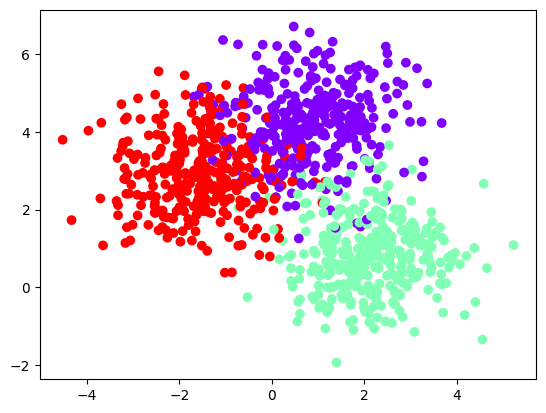

In [48]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

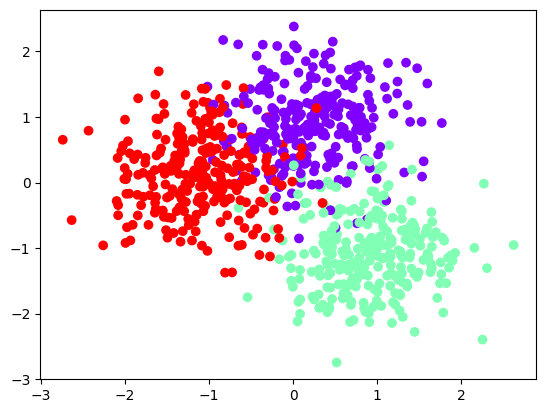

In [51]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=y_train,cmap='rainbow')

In [52]:
from sklearn.cluster import KMeans


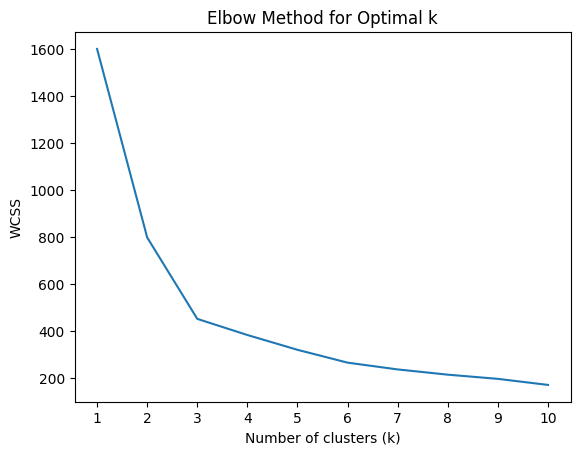

In [53]:
#ELbow mwthod to find optimal number of clusters
wcss=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(k_range,wcss)
plt.xticks(k_range)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


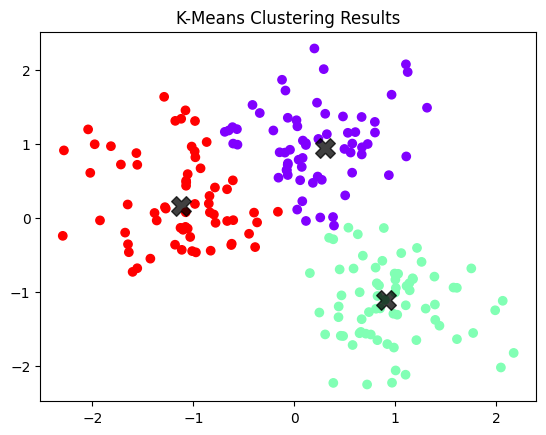

In [54]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(X_train_scaled)
y_kmeans=kmeans.predict(X_test_scaled)
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=y_kmeans,cmap='rainbow')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.75,marker='X')    
plt.title('K-Means Clustering Results')
plt.show()

In [40]:
#Validating the K value - KneeLocator, Silhouette Score
!pip install kneed


In [41]:
from kneed import KneeLocator
kl=KneeLocator(k_range,wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [42]:
from sklearn.metrics import silhouette_score
silhouette_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coeff.append(score)

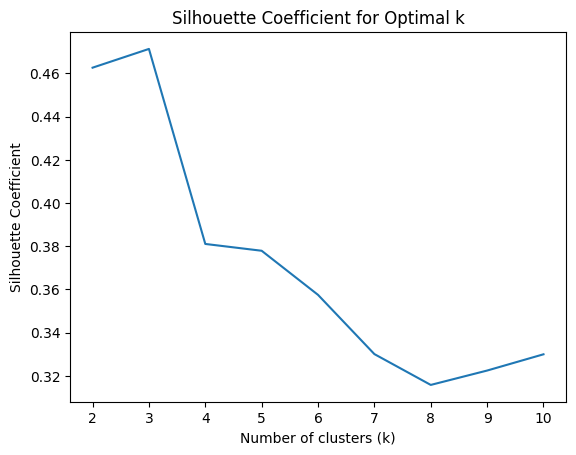

In [43]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for Optimal k')
plt.show()